<a href="https://colab.research.google.com/github/Sant18/Employee_Segmentation/blob/main/Employee_Segment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install pypyodbc

In [ ]:
import pypyodbc as podbc
import pandas as pd

In [ ]:
conn2 = podbc.connect('Driver={SQL Server Native Client 11.0};'
                      'Server=BOOK2\MSSQLSERVER01;'
                      'Database=unsuper;'
                      'Trusted_Connection=yes;')

In [ ]:
SQL_Query = pd.read_sql_query('''SELECT * FROM [dbo].[Events_Raw_Data]''', conn2)

In [ ]:
SQL_Query.describe()

,latitude,longitude
count,14783.000000,14783.000000
mean,52.665332,-1.983068
std,4.099458,1.803867
min,-7.946717,-14.355916
25%,51.503484,-2.980443
50%,52.400685,-1.930145
75%,54.033791,-0.410466
max,58.353461,12.496366


In [ ]:
for i in SQL_Query.columns:
    print(f'{i}: {len(SQL_Query[i])}: {SQL_Query[i].dtype}\n')

customer: 14783: object

age: 14783: object

gender: 14783: object

postcode: 14783: object

district: 14783: object

constituency: 14783: object

latitude: 14783: float64

longitude: 14783: float64

current_status: 14783: object

total_household_income: 14783: object

how_often_you_attend_entertaining_events_in_a_year: 14783: object

social_media: 14783: object

how_many_hours_are_you_willing_to_travel_to_attend_an_event: 14783: object

do_you_enjoy_adrenaline_rush_activities: 14783: object

are_food_areas_coffee_areas_bars_toilets_important_to_you: 14783: object

what_is_your_favourite_attraction_from_below: 14783: object

were_you_satisfied_with_the_last_event_you_attended_with_us: 14783: object

would_you_recommend_our_events_to_other_people: 14783: object

did_you_find_our_events_value_for_money: 14783: object



In [ ]:
SQL_Query.isnull().sum()

customer                                                       0
age                                                            0
gender                                                         0
postcode                                                       0
district                                                       0
constituency                                                   0
latitude                                                       0
longitude                                                      0
current_status                                                 0
total_household_income                                         5
how_often_you_attend_entertaining_events_in_a_year             5
social_media                                                   5
how_many_hours_are_you_willing_to_travel_to_attend_an_event    5
do_you_enjoy_adrenaline_rush_activities                        5
are_food_areas_coffee_areas_bars_toilets_important_to_you      5
what_is_your_favourite_at

In [ ]:
SQL_Query[SQL_Query.total_household_income.isnull()].index

Int64Index([21, 22, 23, 24, 25], dtype='int64')

In [ ]:
SQL_Query = SQL_Query.dropna(subset=['total_household_income'])

In [ ]:
SQL_Query.shape

(14778, 19)

In [ ]:
for col in SQL_Query:
    unique = SQL_Query[col].unique()
    length = len(unique)
    if length < 10:
        print(f'\n{col}: {length}: {unique}')
    else:
        print(f'\n{col}: {length}')


customer: 14778

age: 9: ['40-49' '60-64' '50-59' '65 or older' '33-39' '26-32' '21-25'
 '17 or younger' '18-20']

gender: 2: ['Female' 'Male']

postcode: 14674

district: 225

constituency: 358

latitude: 13242

longitude: 13262

current_status: 8: ['Married with children' 'Married without children' 'Living with partner'
 'Divorced' 'Single, never married' 'Separated' 'Widowed' 'Step parent']

total_household_income: 8: ['50,000 to 74,999' '35,000 to 49,999' '75,000 to 99,999'
 '100,000 to 149,999' '150,000 to 199,999' '200,000 or more'
 '20,000 to 34,999' 'Less than 20,000']

how_often_you_attend_entertaining_events_in_a_year: 5: ['4 Times a Year' '3 Times a Year' '1 Times a Year' '2 Times a Year'
 '5+ Times a Year']

social_media: 5: ['Up to 1 hour' "I don't spend any time at all" 'Half a day'
 'Up to 2 hours' 'More than half a day']

how_many_hours_are_you_willing_to_travel_to_attend_an_event: 7: ['3 hours' '5 hours' '1 hour' '6 hours plus' '4 hours' '2 hours'
 'Depends from the E

In [ ]:
SQL_Query['customer'] = SQL_Query['customer'].astype(int)

In [ ]:
def obj(df):
    o = []
    for i in SQL_Query:
        if SQL_Query[i].dtype == 'object':
            o.append(i)
    return o

In [ ]:
features = ['age', 'gender', 
       'current_status', 'total_household_income',
       'how_often_you_attend_entertaining_events_in_a_year', 'social_media',
       'how_many_hours_are_you_willing_to_travel_to_attend_an_event',
       'do_you_enjoy_adrenaline_rush_activities',
       'are_food_areas_coffee_areas_bars_toilets_important_to_you',
       'what_is_your_favourite_attraction_from_below','were_you_satisfied_with_the_last_event_you_attended_with_us',
       'would_you_recommend_our_events_to_other_people',
       'did_you_find_our_events_value_for_money']

In [ ]:
'''import seaborn as sns
import matplotlib.pyplot as plt

for i in obj(SQL_Query):
    sns.countplot(x=i, data=SQL_Query, palette='Set3')
    plt.xticks(rotation=45)
    plt.show()'''

"import seaborn as sns\nimport matplotlib.pyplot as plt\n\nfor i in obj(SQL_Query):\n    sns.countplot(x=i, data=SQL_Query, palette='Set3')\n    plt.xticks(rotation=45)\n    plt.show()"

In [ ]:
print(SQL_Query.shape)

raw_data = SQL_Query[features]
print(raw_data.shape)

# Making categorical variables into numeric representation
new_raw_data = pd.get_dummies(raw_data, columns = features)

print(new_raw_data.shape)

new_raw_data.head()

(14778, 19)
(14778, 13)
(14778, 86)


,age_17 or younger,age_18-20,age_21-25,age_26-32,age_33-39,age_40-49,age_50-59,age_60-64,age_65 or older,gender_Female,...,would_you_recommend_our_events_to_other_people_Somewhat Unlikely,would_you_recommend_our_events_to_other_people_Very Likely,would_you_recommend_our_events_to_other_people_Very Unlikely,did_you_find_our_events_value_for_money_Entirely agree,did_you_find_our_events_value_for_money_Entirely disagree,did_you_find_our_events_value_for_money_Mostly agree,did_you_find_our_events_value_for_money_Mostly disagree,did_you_find_our_events_value_for_money_Neither agree nor disagree,did_you_find_our_events_value_for_money_Somewhat agree,did_you_find_our_events_value_for_money_Somewhat disagree
0,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0


In [ ]:
from sklearn.cluster import KMeans
X_train = new_raw_data.values

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans = kmeans.fit(X_train)

print(f'Inertia: {kmeans.inertia_}')

Inertia: 101900.29058795131


In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
for k in range(3, 12):
    print(k)

3
4
5
6
7
8
9
10
11


In [ ]:
np.arange(3,12)

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11])

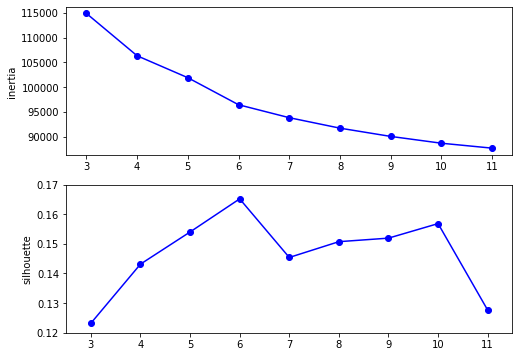

In [ ]:
'''kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train) for k in range(3, 12)]
inertia = [model.inertia_ for model in kmeans_per_k]
silhouette_scores = [silhouette_score(X_train, model.labels_)
                     for model in kmeans_per_k]
'''

fig, ax = plt.subplots(2, figsize=(8,6))

ax[0].plot(range(3, 12), inertia, 'bo-')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(3,12))
#ax[0].axis([1,20, 50000, 150000])
ax[1].plot(range(3, 12), silhouette_scores, 'bo-')
ax[1].set_ylabel('silhouette')
ax[1].set_xticks(np.arange(3,12))
ax[1].axis([2.5,11.5, 0.12, 0.17])

plt.show()

In [ ]:
from sklearn.cluster import KMeans
X_train = new_raw_data.values

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans = kmeans.fit(X_train)

print(f'Inertia: {kmeans.inertia_}')

Inertia: 101900.29058795131


In [ ]:
predictions = kmeans.predict(X_train)

In [ ]:
predictions

array([3, 2, 2, ..., 3, 1, 2])

In [ ]:
uni, count = np.unique(predictions, return_counts=True)
count = count.reshape(1, 5)
count_df = pd.DataFrame(count, columns=['C0', 'C1', 'C2', 'C3', 'C4'])
count_df

,C0,C1,C2,C3,C4
0,2836,2178,4081,4459,1224


In [ ]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns

In [ ]:
X = X_train
y_num = predictions

target_names = columns=['C0', 'C1', 'C2', 'C3', 'C4']

pca = PCA(n_components=2, random_state=453)
X_r = pca.fit_transform(X)


print(f'Explained Variance: {str(pca.explained_variance_ratio_)}')

Explained Variance: [0.16735568 0.07817705]


<Figure size 432x288 with 0 Axes>

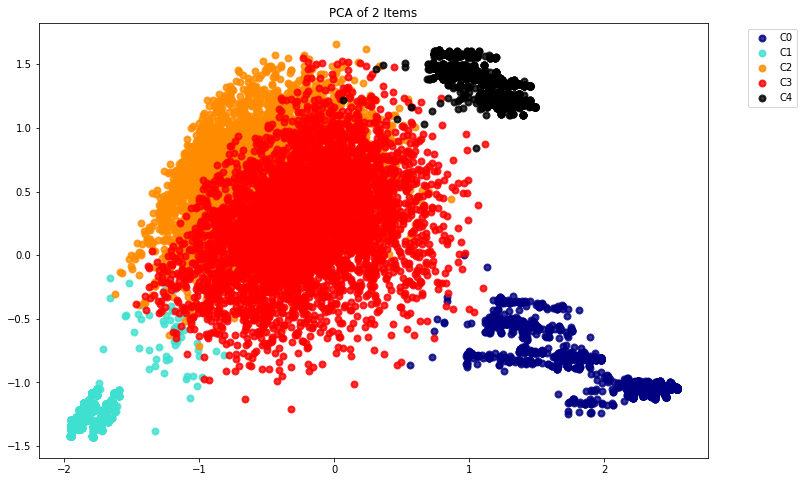

In [ ]:
# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

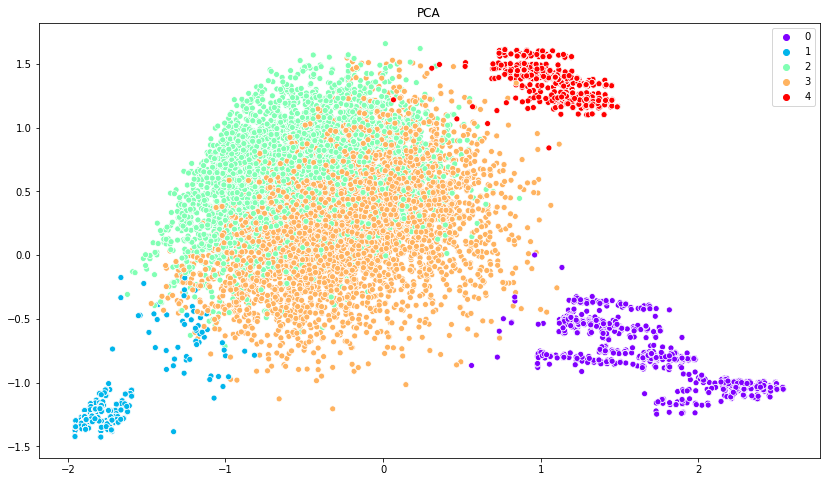

In [ ]:
fig, ax = plt.subplots(figsize=(14,8))
sns.scatterplot(x=X_r[:, 0], y=X_r[:, 1], 
                hue=predictions, ax=ax, palette='rainbow',
               legend='full')
ax.set_title('PCA')
ax.legend
plt.show()

In [ ]:
pca = PCA(n_components=0.95)
X_r = pca.fit_transform(X)

In [ ]:
pca.n_components_

53

In [ ]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

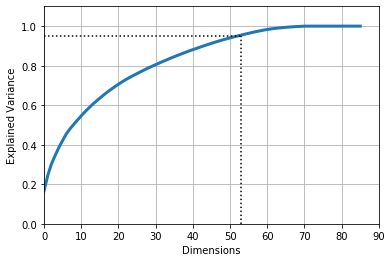

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 90, 0, 1.1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.grid(True)
plt.show()

In [ ]:
raw_data.shape

(14778, 13)

In [ ]:
raw_data['how_often_you_attend_entertaining_events_in_a_year'].head()

0    4 Times a Year
1    3 Times a Year
2    3 Times a Year
3    1 Times a Year
4    3 Times a Year
Name: how_often_you_attend_entertaining_events_in_a_year, dtype: object

In [ ]:
def change_attend_column(data):
    if (data is None or data is np.nan):
        return np.nan
    elif data in ['4 Times a Year', '5+ Times a Year']:
        return '4+ Times a year'
    elif data in ['1 Times a Year', '2 Times a Year']:
        return '1 or 2 Times a Year'
    else:
        return data

In [ ]:
raw_data['how_often_you_attend_entertaining_events_in_a_year'] = raw_data['how_often_you_attend_entertaining_events_in_a_year'].apply(change_attend_column)
#use loc function before apply

C:\Users\santa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
raw_data['social_media'] = raw_data['social_media'].apply(lambda x: if 'More than half a day' x == 'Half a day' else x) 

Up to 1 hour                     4622
More than half a day             4365
I don't spend any time at all    3890
Up to 2 hours                    1901
Name: social_media, dtype: int64

In [ ]:
raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event'].loc[raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event'].isin(['1 hour', '2 hours'])] = '1 to 2 hours'
#Check 'SettingWithCopyWarning' warning

C:\Users\santa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event'].loc[raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event'].isin(['3 hours', '4 hours'])] = '3 to 4 hours'
raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event'].loc[raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event'].isin(['5 hours', '6 hours plus'])] = '5 to 6 hours'
#Check 'SettingWithCopyWarning' warning

C:\Users\santa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\santa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
raw_data['how_many_hours_are_you_willing_to_travel_to_attend_an_event'].value_counts()

5 to 6 hours              7653
1 to 2 hours              3577
3 to 4 hours              3418
Depends from the Event     130
Name: how_many_hours_are_you_willing_to_travel_to_attend_an_event, dtype: int64

In [ ]:
raw_data['do_you_enjoy_adrenaline_rush_activities'].loc[raw_data['do_you_enjoy_adrenaline_rush_activities'].isin(['Mostly agree', 'Somewhat agree'])] = 'Mostly and Somewhat Agree'
raw_data['do_you_enjoy_adrenaline_rush_activities'].loc[raw_data['do_you_enjoy_adrenaline_rush_activities'].isin(['Mostly disagree', 'Somewhat disagree'])] = 'Mostly and Somewhat Disagree'
#Check 'SettingWithCopyWarning' warning

C:\Users\santa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\santa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
raw_data.do_you_enjoy_adrenaline_rush_activities.value_counts()

Entirely agree                  5457
Mostly and Somewhat Agree       3282
Mostly and Somewhat Disagree    2907
Entirely disagree               1993
Neither agree nor disagree      1139
Name: do_you_enjoy_adrenaline_rush_activities, dtype: int64

In [ ]:
raw_data.shape

(14778, 13)

In [ ]:
new_raw_data = pd.get_dummies(raw_data, columns = features)

print(new_raw_data.shape)

new_raw_data.head()

(14778, 78)


,age_17 or younger,age_18-20,age_21-25,age_26-32,age_33-39,age_40-49,age_50-59,age_60-64,age_65 or older,gender_Female,...,would_you_recommend_our_events_to_other_people_Somewhat Unlikely,would_you_recommend_our_events_to_other_people_Very Likely,would_you_recommend_our_events_to_other_people_Very Unlikely,did_you_find_our_events_value_for_money_Entirely agree,did_you_find_our_events_value_for_money_Entirely disagree,did_you_find_our_events_value_for_money_Mostly agree,did_you_find_our_events_value_for_money_Mostly disagree,did_you_find_our_events_value_for_money_Neither agree nor disagree,did_you_find_our_events_value_for_money_Somewhat agree,did_you_find_our_events_value_for_money_Somewhat disagree
0,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0


In [ ]:
raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you'].loc[raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you'].isin(['Mostly agree', 'Somewhat agree'])] = 'Mostly and Somewhat Agree'
raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you'].loc[raw_data['are_food_areas_coffee_areas_bars_toilets_important_to_you'].isin(['Mostly disagree', 'Somewhat disagree'])] = 'Mostly and Somewhat Disagree'
#Check 'SettingWithCopyWarning' warning

C:\Users\santa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\santa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
raw_data['were_you_satisfied_with_the_last_event_you_attended_with_us'].loc[raw_data['were_you_satisfied_with_the_last_event_you_attended_with_us'].isin(['Mostly agree', 'Somewhat agree'])] = 'Mostly and Somewhat Agree'
raw_data['were_you_satisfied_with_the_last_event_you_attended_with_us'].loc[raw_data['were_you_satisfied_with_the_last_event_you_attended_with_us'].isin(['Mostly disagree', 'Somewhat disagree'])] = 'Mostly and Somewhat Disagree'
#Check 'SettingWithCopyWarning' warning

C:\Users\santa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\santa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
raw_data['would_you_recommend_our_events_to_other_people'].loc[raw_data['would_you_recommend_our_events_to_other_people'].isin(['Somewhat Unlikely', 'Mostly Unlikely'])] = 'Mostly and Somewhat Unlikely'
#Check 'SettingWithCopyWarning' warning

C:\Users\santa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
raw_data['did_you_find_our_events_value_for_money'].loc[raw_data['did_you_find_our_events_value_for_money'].isin(['Mostly agree', 'Somewhat agree'])] = 'Mostly and Somewhat Agree'
#Check 'SettingWithCopyWarning' warning

C:\Users\santa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
raw_data['did_you_find_our_events_value_for_money'].value_counts()

Entirely agree                3480
Somewhat disagree             3434
Mostly and Somewhat Agree     3112
Mostly disagree               2442
Neither agree nor disagree    1171
Entirely disagree             1139
Name: did_you_find_our_events_value_for_money, dtype: int64

In [ ]:
new_raw_data = pd.get_dummies(raw_data, columns = features)

print(new_raw_data.shape)

new_raw_data.head()

(14778, 72)


,age_17 or younger,age_18-20,age_21-25,age_26-32,age_33-39,age_40-49,age_50-59,age_60-64,age_65 or older,gender_Female,...,would_you_recommend_our_events_to_other_people_Neither agree nor disagree,would_you_recommend_our_events_to_other_people_Somewhat Likely,would_you_recommend_our_events_to_other_people_Very Likely,would_you_recommend_our_events_to_other_people_Very Unlikely,did_you_find_our_events_value_for_money_Entirely agree,did_you_find_our_events_value_for_money_Entirely disagree,did_you_find_our_events_value_for_money_Mostly and Somewhat Agree,did_you_find_our_events_value_for_money_Mostly disagree,did_you_find_our_events_value_for_money_Neither agree nor disagree,did_you_find_our_events_value_for_money_Somewhat disagree
0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [ ]:
X_train = new_raw_data

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train) for k in range(3, 12)]
inertia = [model.inertia_ for model in kmeans_per_k]
silhouette_scores = [silhouette_score(X_train, model.labels_)
                     for model in kmeans_per_k]


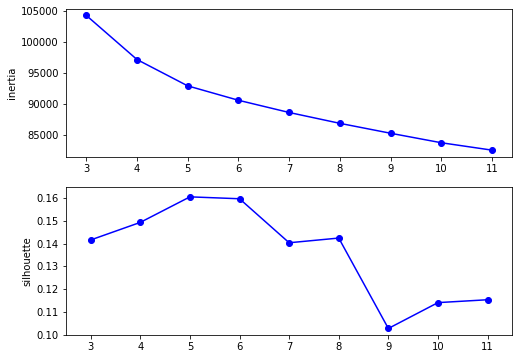

In [ ]:
fig, ax = plt.subplots(2, figsize=(8,6))

ax[0].plot(range(3, 12), inertia, 'bo-')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(3,12))
#ax[0].axis([1,20, 50000, 150000])
ax[1].plot(range(3, 12), silhouette_scores, 'bo-')
ax[1].set_ylabel('silhouette')
ax[1].set_xticks(np.arange(3,12))
ax[1].axis([2.5,11.5, 0.10, 0.165])

plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans = kmeans.fit(X_train)
predictions = kmeans.predict(X_train)

In [ ]:
X = X_train
y_num = predictions

target_names = columns=['C0', 'C1', 'C2', 'C3', 'C4']

pca = PCA(n_components=2, random_state=453)
X_r = pca.fit_transform(X)


print(f'Explained Variance: {str(pca.explained_variance_ratio_)}')

Explained Variance: [0.19157562 0.08232953]


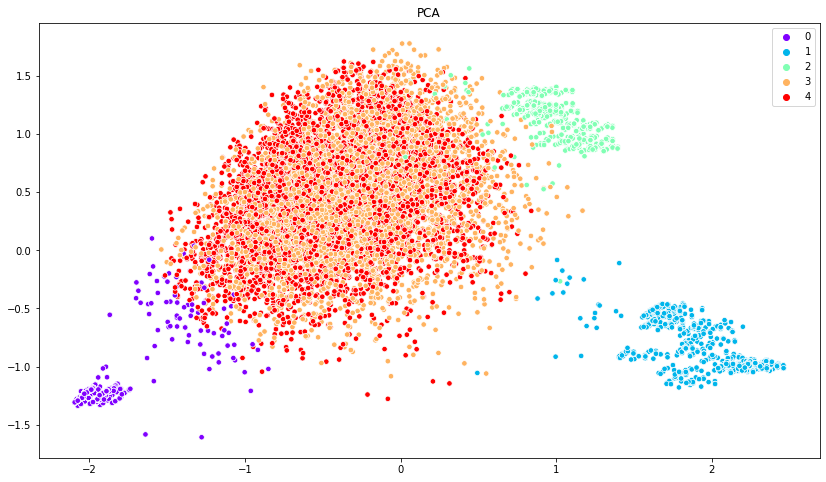

In [ ]:
fig, ax = plt.subplots(figsize=(14,8))
sns.scatterplot(x=X_r[:, 0], y=X_r[:, 1], 
                hue=predictions, ax=ax, palette='rainbow',
               legend='full', s=30)
ax.set_title('PCA')
ax.legend
plt.show()

In [ ]:
pca = PCA(n_components=0.95)
X_r = pca.fit_transform(X_train)

<Figure size 432x288 with 0 Axes>

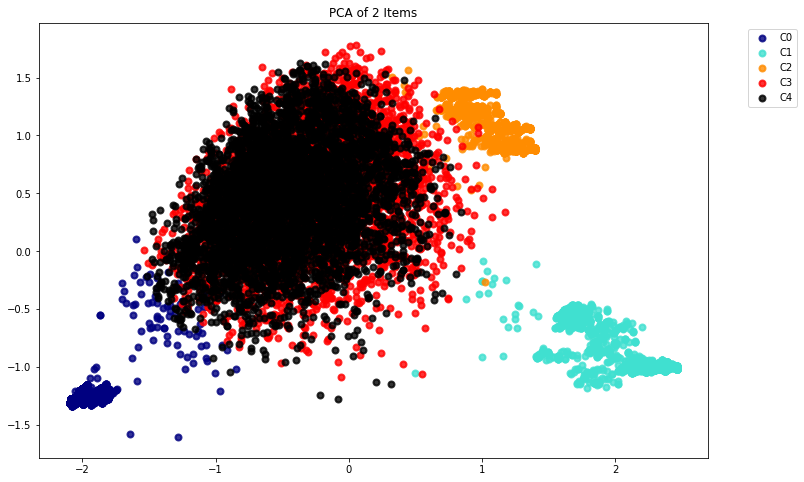

In [ ]:
# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

In [ ]:
pca = PCA(n_components=0.95)
X_r = pca.fit_transform(X)

In [ ]:
pca.n_components_

43

In [ ]:
X = X_train
y_num = predictions

target_names = columns=['C0', 'C1', 'C2', 'C3', 'C4']

pca = PCA(n_components=43, random_state=453)
X_r = pca.fit_transform(X)


print(f'Explained Variance: {str(pca.explained_variance_ratio_)}')

Explained Variance: [0.19157562 0.08232953 0.05596284 0.04498093 0.0406806  0.03451748
 0.02829802 0.02759875 0.02492237 0.02483315 0.02343124 0.02190703
 0.02085901 0.01956729 0.01817253 0.01745073 0.01698403 0.01564833
 0.0151641  0.01433236 0.01405472 0.01335124 0.01280406 0.01194628
 0.01165961 0.01106918 0.01059321 0.01035317 0.00989817 0.00965203
 0.00916701 0.00875108 0.00850222 0.00842795 0.00819489 0.00748406
 0.00737693 0.00716208 0.00694836 0.00662828 0.00633494 0.00595752
 0.00556367]


In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_r) for k in range(3, 12)]
inertia = [model.inertia_ for model in kmeans_per_k]
silhouette_scores = [silhouette_score(X_r, model.labels_)
                     for model in kmeans_per_k]


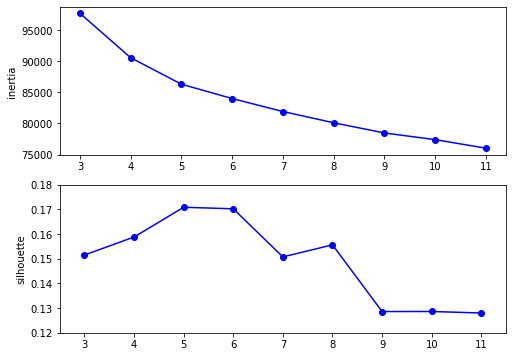

In [ ]:
fig, ax = plt.subplots(2, figsize=(8,6))

ax[0].plot(range(3, 12), inertia, 'bo-')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(3,12))
#ax[0].axis([1,20, 50000, 150000])
ax[1].plot(range(3, 12), silhouette_scores, 'bo-')
ax[1].set_ylabel('silhouette')
ax[1].set_xticks(np.arange(3,12))
ax[1].axis([2.5,11.5, 0.12, 0.18])

plt.show()

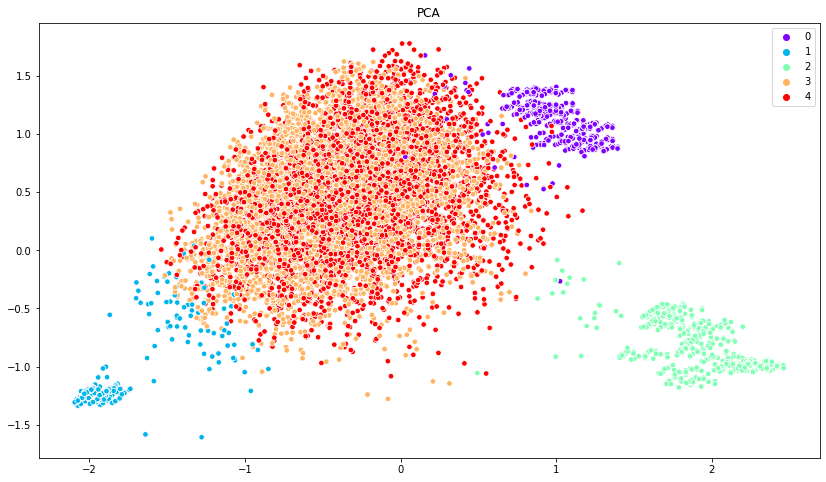

In [ ]:
fig, ax = plt.subplots(figsize=(14,8))
sns.scatterplot(x=X_r[:, 0], y=X_r[:, 1], 
                hue=predictions, ax=ax, palette='rainbow',
               legend='full', s=30)
ax.set_title('PCA')
ax.legend
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans = kmeans.fit(X_r)
predictions = kmeans.predict(X_r)

In [ ]:
clusters = kmeans.labels_

In [ ]:
SQL_Query['Clusters'] = clusters

In [ ]:
SQL_Query['Cluster Category'] = 'No Data'

In [ ]:
SQL_Query['Cluster Category'].loc[SQL_Query['Clusters'] == 0] = 'Cluster 0'
SQL_Query['Cluster Category'].loc[SQL_Query['Clusters'] == 1] = 'Cluster 1'
SQL_Query['Cluster Category'].loc[SQL_Query['Clusters'] == 2] = 'Cluster 2'
SQL_Query['Cluster Category'].loc[SQL_Query['Clusters'] == 3] = 'Cluster 3'
SQL_Query['Cluster Category'].loc[SQL_Query['Clusters'] == 4] = 'Cluster 4'

In [ ]:
SQL_Query['Cluster Category'].value_counts()

Cluster 3    4591
Cluster 4    3895
Cluster 2    2847
Cluster 1    2202
Cluster 0    1243
Name: Cluster Category, dtype: int64

In [ ]:
SQL_Query.columns

Index(['customer', 'age', 'gender', 'postcode', 'district', 'constituency',
       'latitude', 'longitude', 'current_status', 'total_household_income',
       'how_often_you_attend_entertaining_events_in_a_year', 'social_media',
       'how_many_hours_are_you_willing_to_travel_to_attend_an_event',
       'do_you_enjoy_adrenaline_rush_activities',
       'are_food_areas_coffee_areas_bars_toilets_important_to_you',
       'what_is_your_favourite_attraction_from_below',
       'were_you_satisfied_with_the_last_event_you_attended_with_us',
       'would_you_recommend_our_events_to_other_people',
       'did_you_find_our_events_value_for_money', 'Clusters',
       'Cluster Category'],
      dtype='object')

In [ ]:
SQL_Query['did_you_find_our_events_value_for_money'].value_counts()

Entirely agree                3480
Somewhat disagree             3434
Mostly disagree               2442
Mostly agree                  1883
Somewhat agree                1229
Neither agree nor disagree    1171
Entirely disagree             1139
Name: did_you_find_our_events_value_for_money, dtype: int64

In [ ]:
SQL_Query['Household Income Order'] = 0
SQL_Query['Household Income Order'].loc[SQL_Query['total_household_income'] == 'Less than 20,000'] = 1
SQL_Query['Household Income Order'].loc[SQL_Query['total_household_income'] == '20,000 to 34,999'] = 2
SQL_Query['Household Income Order'].loc[SQL_Query['total_household_income'] == '35,000 to 49,999'] = 3
SQL_Query['Household Income Order'].loc[SQL_Query['total_household_income'] == '50,000 to 74,999'] = 4
SQL_Query['Household Income Order'].loc[SQL_Query['total_household_income'] == '75,000 to 99,999'] = 5
SQL_Query['Household Income Order'].loc[SQL_Query['total_household_income'] == '100,000 to 149,999'] = 6
SQL_Query['Household Income Order'].loc[SQL_Query['total_household_income'] == '150,000 to 199,999'] = 7
SQL_Query['Household Income Order'].loc[SQL_Query['total_household_income'] == '200,000 or more'] = 8


In [ ]:
SQL_Query['social_media'] = SQL_Query['social_media'].str.replace("'","")

# Creating an order for Social Media Time Spend
SQL_Query['Social Media Time Spend Order'] = 0
SQL_Query['Social Media Time Spend Order'].loc[SQL_Query['social_media'] == 'I dont spend any time at all'] = 1
SQL_Query['Social Media Time Spend Order'].loc[SQL_Query['social_media'] == 'Up to 1 hour'] = 2
SQL_Query['Social Media Time Spend Order'].loc[SQL_Query['social_media'] == 'Up to 2 hours'] = 3
SQL_Query['Social Media Time Spend Order'].loc[SQL_Query['social_media'] == 'Half a day'] = 4
SQL_Query['Social Media Time Spend Order'].loc[SQL_Query['social_media'] == 'More than half a day'] = 5


In [ ]:
# Creating an order for food_areas_coffee_areas_bars_toilets that have Entirely Agree, etc..
SQL_Query['food_areas_coffee_areas_bars_toilets Agree Order'] = 0
SQL_Query['food_areas_coffee_areas_bars_toilets Agree Order'].loc[SQL_Query['are_food_areas_coffee_areas_bars_toilets_important_to_you'] == 'Entirely agree'] = 1
SQL_Query['food_areas_coffee_areas_bars_toilets Agree Order'].loc[SQL_Query['are_food_areas_coffee_areas_bars_toilets_important_to_you'] == 'Mostly agree'] = 2
SQL_Query['food_areas_coffee_areas_bars_toilets Agree Order'].loc[SQL_Query['are_food_areas_coffee_areas_bars_toilets_important_to_you'] == 'Somewhat agree'] = 3
SQL_Query['food_areas_coffee_areas_bars_toilets Agree Order'].loc[SQL_Query['are_food_areas_coffee_areas_bars_toilets_important_to_you'] == 'Neither agree nor disagree'] = 4
SQL_Query['food_areas_coffee_areas_bars_toilets Agree Order'].loc[SQL_Query['are_food_areas_coffee_areas_bars_toilets_important_to_you'] == 'Somewhat disagree'] = 5
SQL_Query['food_areas_coffee_areas_bars_toilets Agree Order'].loc[SQL_Query['are_food_areas_coffee_areas_bars_toilets_important_to_you'] == 'Mostly disagree'] = 6
SQL_Query['food_areas_coffee_areas_bars_toilets Agree Order'].loc[SQL_Query['are_food_areas_coffee_areas_bars_toilets_important_to_you'] == 'Entirely disagree'] = 7

In [ ]:
# Creating an order for do_you_enjoy_adrenaline_rush_activities
SQL_Query['enjoy_adrenaline_rush_activities Agree Order'] = 0
SQL_Query['enjoy_adrenaline_rush_activities Agree Order'].loc[SQL_Query['do_you_enjoy_adrenaline_rush_activities'] == 'Entirely agree'] = 1
SQL_Query['enjoy_adrenaline_rush_activities Agree Order'].loc[SQL_Query['do_you_enjoy_adrenaline_rush_activities'] == 'Mostly agree'] = 2
SQL_Query['enjoy_adrenaline_rush_activities Agree Order'].loc[SQL_Query['do_you_enjoy_adrenaline_rush_activities'] == 'Somewhat agree'] = 3
SQL_Query['enjoy_adrenaline_rush_activities Agree Order'].loc[SQL_Query['do_you_enjoy_adrenaline_rush_activities'] == 'Neither agree nor disagree'] = 4
SQL_Query['enjoy_adrenaline_rush_activities Agree Order'].loc[SQL_Query['do_you_enjoy_adrenaline_rush_activities'] == 'Somewhat disagree'] = 5
SQL_Query['enjoy_adrenaline_rush_activities Agree Order'].loc[SQL_Query['do_you_enjoy_adrenaline_rush_activities'] == 'Mostly disagree'] = 6
SQL_Query['enjoy_adrenaline_rush_activities Agree Order'].loc[SQL_Query['do_you_enjoy_adrenaline_rush_activities'] == 'Entirely disagree'] = 7

In [ ]:
# Creating an order for were_you_satisfied_with_the_last_event_you_attended_with_us
SQL_Query['Satisfied Agree Order'] = 0
SQL_Query['Satisfied Agree Order'].loc[SQL_Query['were_you_satisfied_with_the_last_event_you_attended_with_us'] == 'Entirely agree'] = 1
SQL_Query['Satisfied Agree Order'].loc[SQL_Query['were_you_satisfied_with_the_last_event_you_attended_with_us'] == 'Mostly agree'] = 2
SQL_Query['Satisfied Agree Order'].loc[SQL_Query['were_you_satisfied_with_the_last_event_you_attended_with_us'] == 'Somewhat agree'] = 3
SQL_Query['Satisfied Agree Order'].loc[SQL_Query['were_you_satisfied_with_the_last_event_you_attended_with_us'] == 'Neither agree nor disagree'] = 4
SQL_Query['Satisfied Agree Order'].loc[SQL_Query['were_you_satisfied_with_the_last_event_you_attended_with_us'] == 'Somewhat disagree'] = 5
SQL_Query['Satisfied Agree Order'].loc[SQL_Query['were_you_satisfied_with_the_last_event_you_attended_with_us'] == 'Mostly disagree'] = 6
SQL_Query['Satisfied Agree Order'].loc[SQL_Query['were_you_satisfied_with_the_last_event_you_attended_with_us'] == 'Entirely disagree'] = 7


In [ ]:
# Creating an order for did_you_find_our_events_value_for_money
SQL_Query['Value_for_money Agree Order'] = 0
SQL_Query['Value_for_money Agree Order'].loc[SQL_Query['did_you_find_our_events_value_for_money'] == 'Entirely agree'] = 1
SQL_Query['Value_for_money Agree Order'].loc[SQL_Query['did_you_find_our_events_value_for_money'] == 'Mostly agree'] = 2
SQL_Query['Value_for_money Agree Order'].loc[SQL_Query['did_you_find_our_events_value_for_money'] == 'Somewhat agree'] = 3
SQL_Query['Value_for_money Agree Order'].loc[SQL_Query['did_you_find_our_events_value_for_money'] == 'Neither agree nor disagree'] = 4
SQL_Query['Value_for_money Agree Order'].loc[SQL_Query['did_you_find_our_events_value_for_money'] == 'Somewhat disagree'] = 5
SQL_Query['Value_for_money Agree Order'].loc[SQL_Query['did_you_find_our_events_value_for_money'] == 'Mostly disagree'] = 6
SQL_Query['Value_for_money Agree Order'].loc[SQL_Query['did_you_find_our_events_value_for_money'] == 'Entirely disagree'] = 7


# Creating an order for would_you_recommend_our_events_to_other_people
SQL_Query['Recommend Order'] = 0
SQL_Query['Recommend Order'].loc[SQL_Query['would_you_recommend_our_events_to_other_people'] == 'Very Likely'] = 1
SQL_Query['Recommend Order'].loc[SQL_Query['would_you_recommend_our_events_to_other_people'] == 'Mostly Likely'] = 2
SQL_Query['Recommend Order'].loc[SQL_Query['would_you_recommend_our_events_to_other_people'] == 'Somewhat Likely'] = 3
SQL_Query['Recommend Order'].loc[SQL_Query['would_you_recommend_our_events_to_other_people'] == 'Neither agree nor disagree'] = 4
SQL_Query['Recommend Order'].loc[SQL_Query['would_you_recommend_our_events_to_other_people'] == 'Somewhat Unlikely'] = 5
SQL_Query['Recommend Order'].loc[SQL_Query['would_you_recommend_our_events_to_other_people'] == 'Mostly Unlikely'] = 6
SQL_Query['Recommend Order'].loc[SQL_Query['would_you_recommend_our_events_to_other_people'] == 'Very Unlikely'] = 7

In [ ]:
from sqlalchemy import create_engine
import urllib

In [ ]:
quoted = urllib.parse.quote_plus("Driver={SQL Server Native Client 11.0};"
                     "Server=BOOK2\MSSQLSERVER01;"
                     "Database=unsuper;"
                     "Trusted_Connection=yes;")

engine = create_engine('mssql+pyodbc:///?odbc_connect={}'.format(quoted))

SQL_Query.to_sql('Events_Cluster_Output', schema='dbo', con = engine, if_exists = 'replace')

In [ ]:
#SQL_Query.to_csv('Events_Cluster_Output', sep='\t')

In [ ]:
SQL_Query

,customer,age,gender,postcode,district,constituency,latitude,longitude,current_status,total_household_income,...,did_you_find_our_events_value_for_money,Clusters,Cluster Category,Household Income Order,Social Media Time Spend Order,food_areas_coffee_areas_bars_toilets Agree Order,enjoy_adrenaline_rush_activities Agree Order,Satisfied Agree Order,Value_for_money Agree Order,Recommend Order
0,1,40-49,Female,AL9 7BN,Welwyn Hatfield,Welwyn Hatfield,51.727429,-0.183648,Married with children,"50,000 to 74,999",...,Somewhat disagree,3,Cluster 3,4,2,1,7,3,5,5
1,2,60-64,Male,AL7 1ZW,Welwyn Hatfield,Welwyn Hatfield,51.804482,-0.195898,Married with children,"35,000 to 49,999",...,Entirely disagree,3,Cluster 3,3,2,1,5,2,7,3
2,3,50-59,Male,AB4 5JX,Aberdeenshire,Banff and Buchan,57.692200,-2.022295,Married with children,"75,000 to 99,999",...,Entirely disagree,3,Cluster 3,5,1,3,5,2,7,6
3,4,50-59,Female,B24 0DL,Birmingham,"Birmingham, Erdington",52.526595,-1.822211,Married without children,"35,000 to 49,999",...,Somewhat disagree,2,Cluster 2,3,4,4,1,3,5,3
4,5,60-64,Male,E17 5QP,Waltham Forest,Walthamstow,51.593979,-0.040803,Married with children,"100,000 to 149,999",...,Entirely agree,1,Cluster 1,6,2,4,6,1,1,7
5,6,65 or older,Male,AL7 9AJ,Welwyn Hatfield,Welwyn Hatfield,51.804196,-0.205381,Married with children,"35,000 to 49,999",...,Somewhat agree,3,Cluster 3,3,2,4,6,2,3,5
6,7,50-59,Female,BL1 4NW,Bolton,Bolton West,53.581008,-2.455316,Living with partner,"50,000 to 74,999",...,Somewhat agree,4,Cluster 4,4,2,2,6,2,3,6
7,8,33-39,Male,DA1 9GL,Dartford,Dartford,51.444500,0.209755,Married with children,"100,000 to 149,999",...,Entirely agree,1,Cluster 1,6,2,1,6,1,1,7
8,9,33-39,Female,BL9 9GP,Bury,Bury North,53.580693,-2.283884,Divorced,"35,000 to 49,999",...,Somewhat disagree,2,Cluster 2,3,4,4,1,3,5,3
9,10,33-39,Male,HP22 5ZF,Aylesbury Vale,Aylesbury,51.803390,-0.724381,Married with children,"50,000 to 74,999",...,Somewhat disagree,4,Cluster 4,4,2,2,5,4,5,6


In [ ]:
X

,age_17 or younger,age_18-20,age_21-25,age_26-32,age_33-39,age_40-49,age_50-59,age_60-64,age_65 or older,gender_Female,...,would_you_recommend_our_events_to_other_people_Neither agree nor disagree,would_you_recommend_our_events_to_other_people_Somewhat Likely,would_you_recommend_our_events_to_other_people_Very Likely,would_you_recommend_our_events_to_other_people_Very Unlikely,did_you_find_our_events_value_for_money_Entirely agree,did_you_find_our_events_value_for_money_Entirely disagree,did_you_find_our_events_value_for_money_Mostly and Somewhat Agree,did_you_find_our_events_value_for_money_Mostly disagree,did_you_find_our_events_value_for_money_Neither agree nor disagree,did_you_find_our_events_value_for_money_Somewhat disagree
0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
9,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
